In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from imblearn import under_sampling, over_sampling

In [2]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split

from matplotlib import rcParams
pd.set_option('display.max_columns', None)


rcParams['figure.figsize'] = 12, 4
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

In [3]:
data = pd.read_csv('train.csv', sep=';')

# Dokumentasi & Catatan

## 01. Info Dataset

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


## 02. Pengelompokan Dataset

In [5]:
# pengelompokan kolom berdasarkan jenisnya
cats = ['job','marital','education','default','housing','loan','contact','poutcome','y']
nums = ['age','balance','duration','campaign','pdays','previous']
timestamp = ['day','month']

## 03. Sample / Describe

In [6]:
data.sample(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4284,44,management,married,tertiary,no,4087,yes,no,unknown,19,may,457,5,-1,0,unknown,no
33680,38,services,married,secondary,no,2669,yes,no,cellular,20,apr,208,2,-1,0,unknown,no
41178,47,housemaid,divorced,secondary,no,80,no,no,cellular,19,aug,196,2,-1,0,unknown,no
25744,50,technician,married,secondary,no,3149,yes,no,cellular,19,nov,69,1,190,1,other,no
41876,46,blue-collar,married,tertiary,no,3745,no,no,cellular,19,oct,82,1,-1,0,unknown,no
8945,27,services,single,secondary,no,1913,yes,no,unknown,4,jun,216,2,-1,0,unknown,no
35352,35,blue-collar,married,secondary,no,682,yes,no,cellular,7,may,141,1,-1,0,unknown,no
7033,28,admin.,single,secondary,no,1238,yes,no,unknown,28,may,252,2,-1,0,unknown,no
3004,51,blue-collar,married,secondary,no,7180,yes,no,unknown,14,may,927,1,-1,0,unknown,yes
31425,27,student,single,secondary,no,213,no,no,cellular,27,mar,378,1,-1,0,unknown,yes


In [7]:
data[nums].describe()

,age,balance,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,4918.000000,63.000000,871.000000,275.000000


In [8]:
data[cats].describe()

,job,marital,education,default,housing,loan,contact,poutcome,y
count,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,2,3,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,unknown,no
freq,9732,27214,23202,44396,25130,37967,29285,36959,39922


# Data Cleansing

## a. Handle Missing Value

In [9]:
data.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

## b. Handle Duplicated Data

In [10]:
data.duplicated().sum()

0

In [11]:
# drop_duplicated = data.duplicated(subset=['age','job','marital','education','default','housing',
#                         'loan','contact','loan','contact','duration',
#                        'campaign','pdays','previous','poutcome']).sum()
# print(f'Jumlah row duplicated sebelum dihapus {drop_duplicated}')

# data.drop_duplicates(subset=['age','job','marital','education','default','housing',
#                              'loan','contact','duration','campaign','pdays',
#                              'previous','poutcome'], inplace=True)

# drop_duplicated_after = data.duplicated(subset=['age','job','marital','education','default','housing',
#                                                 'loan','contact','duration','campaign','pdays',
#                                                 'previous','poutcome']).sum()
# print(f'Jumlah row duplicated setelah dihapus: {drop_duplicated_after}')

In [12]:
# Info Setelah di handle duplicate
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


## c. Handle Outlier

### - Outlier Checking (Numerik)

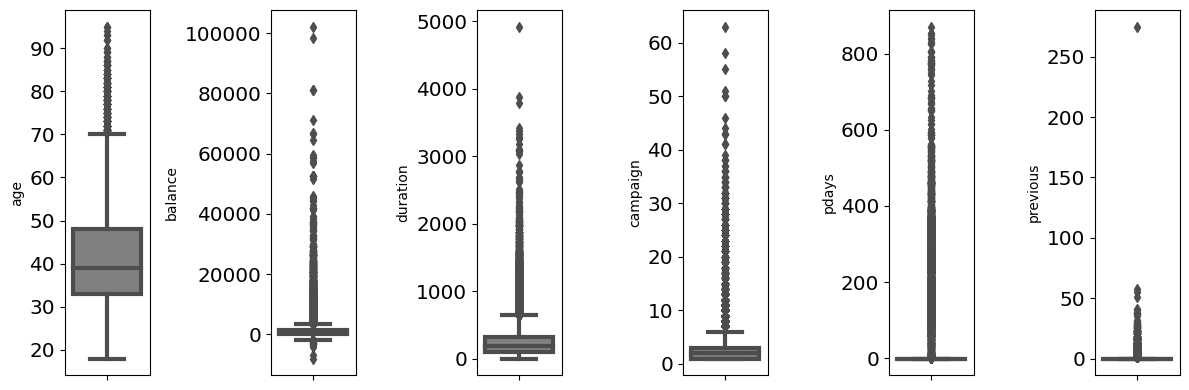

In [13]:
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.boxplot(y=data[nums[i]], color='gray', orient='v')
    plt.tight_layout()
    
plt.show()

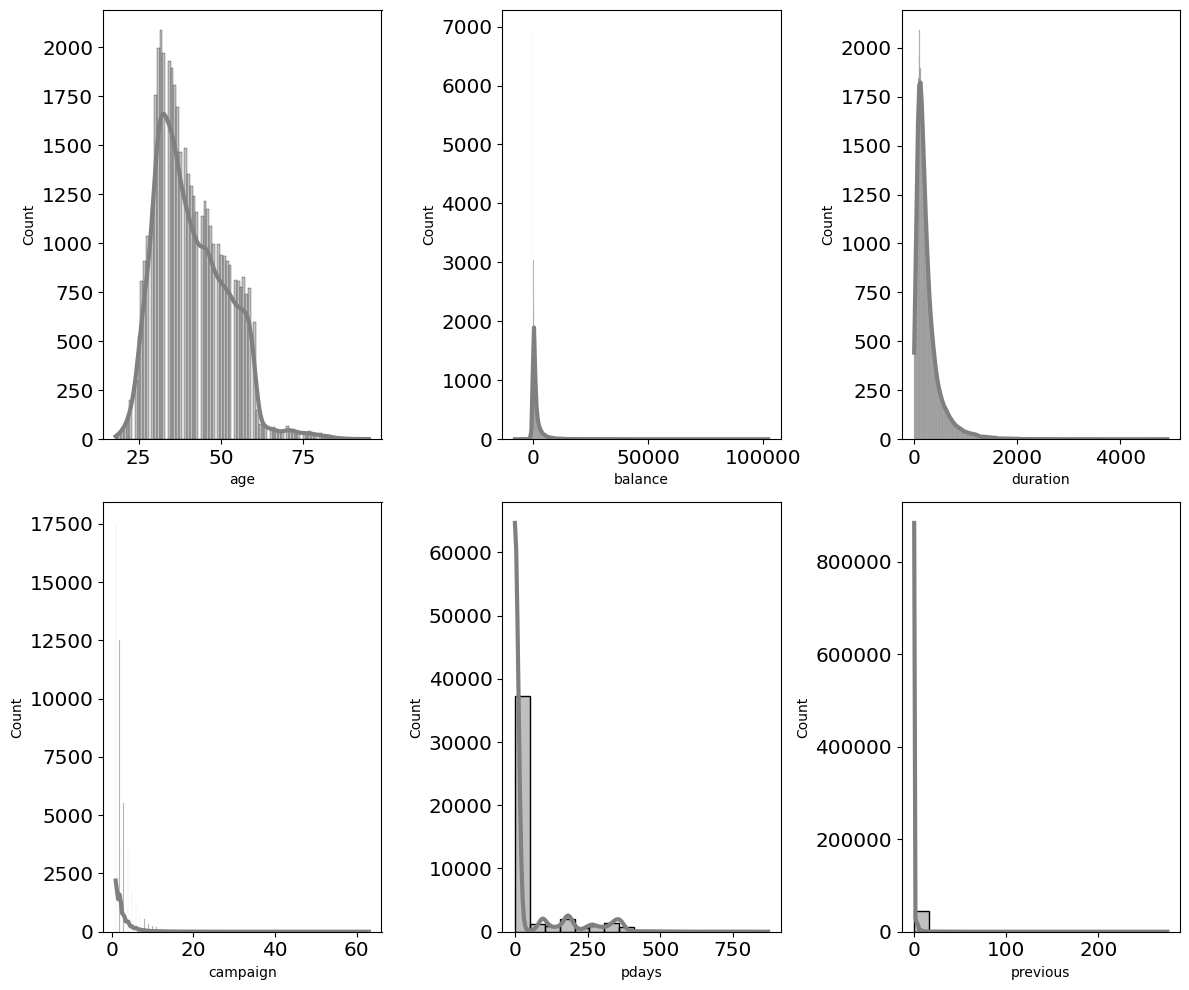

In [14]:
plt.figure(figsize=(12, 10))
num_columns = 3
for i in range(0, len(nums)):
    plt.subplot(2, num_columns, i+1)  # Mengatur 2 baris
    sns.histplot(data[nums[i]], color='gray', kde=True)
    plt.tight_layout()

plt.show()

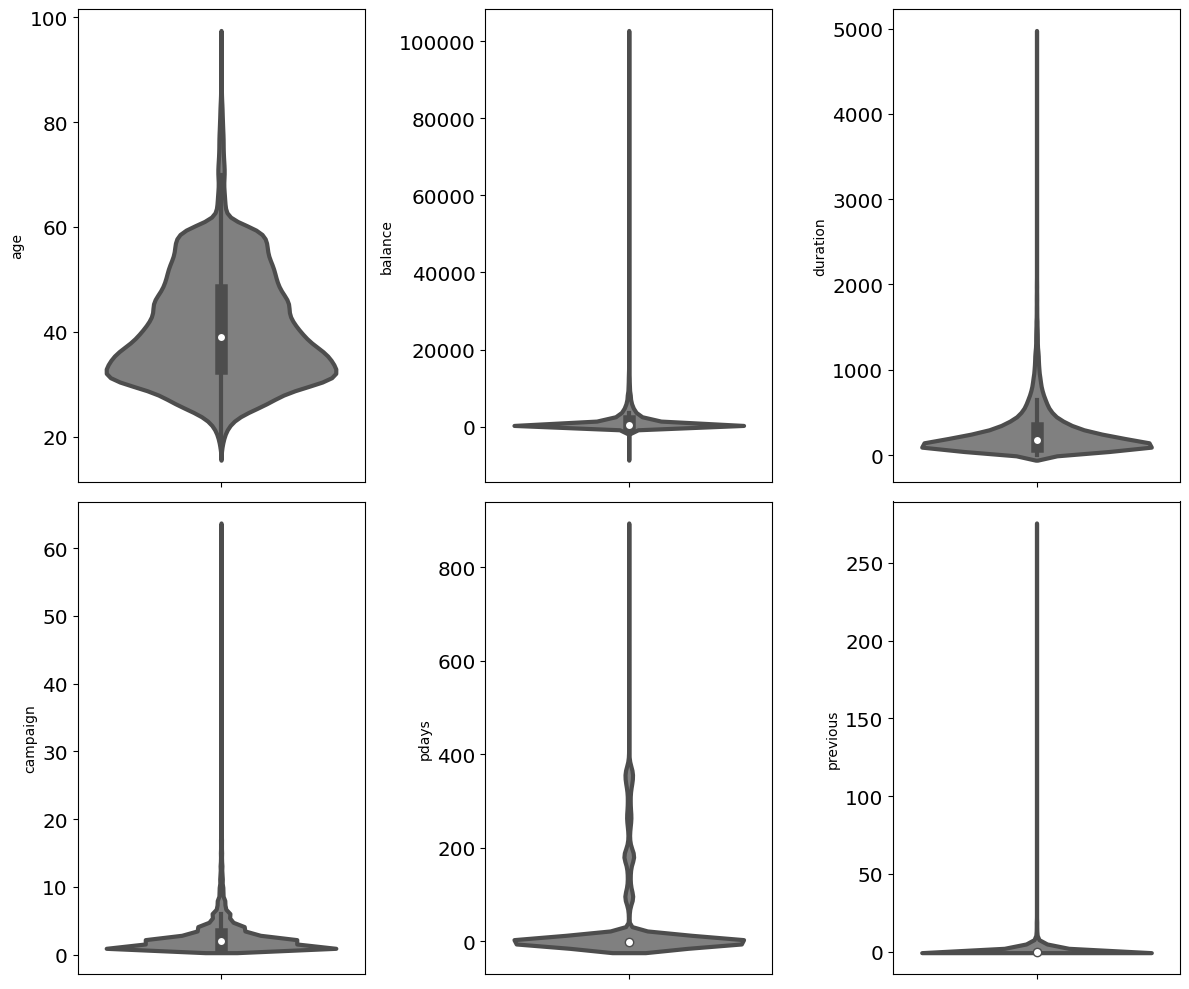

In [15]:
plt.figure(figsize=(12, 10))
num_columns = 3

for i in range(0, len(nums)):
    plt.subplot(2, num_columns, i+1)
    sns.violinplot(y=data[nums[i]], color='gray', orient='v')
    plt.tight_layout()

### - Outlier Checking (Kategori)

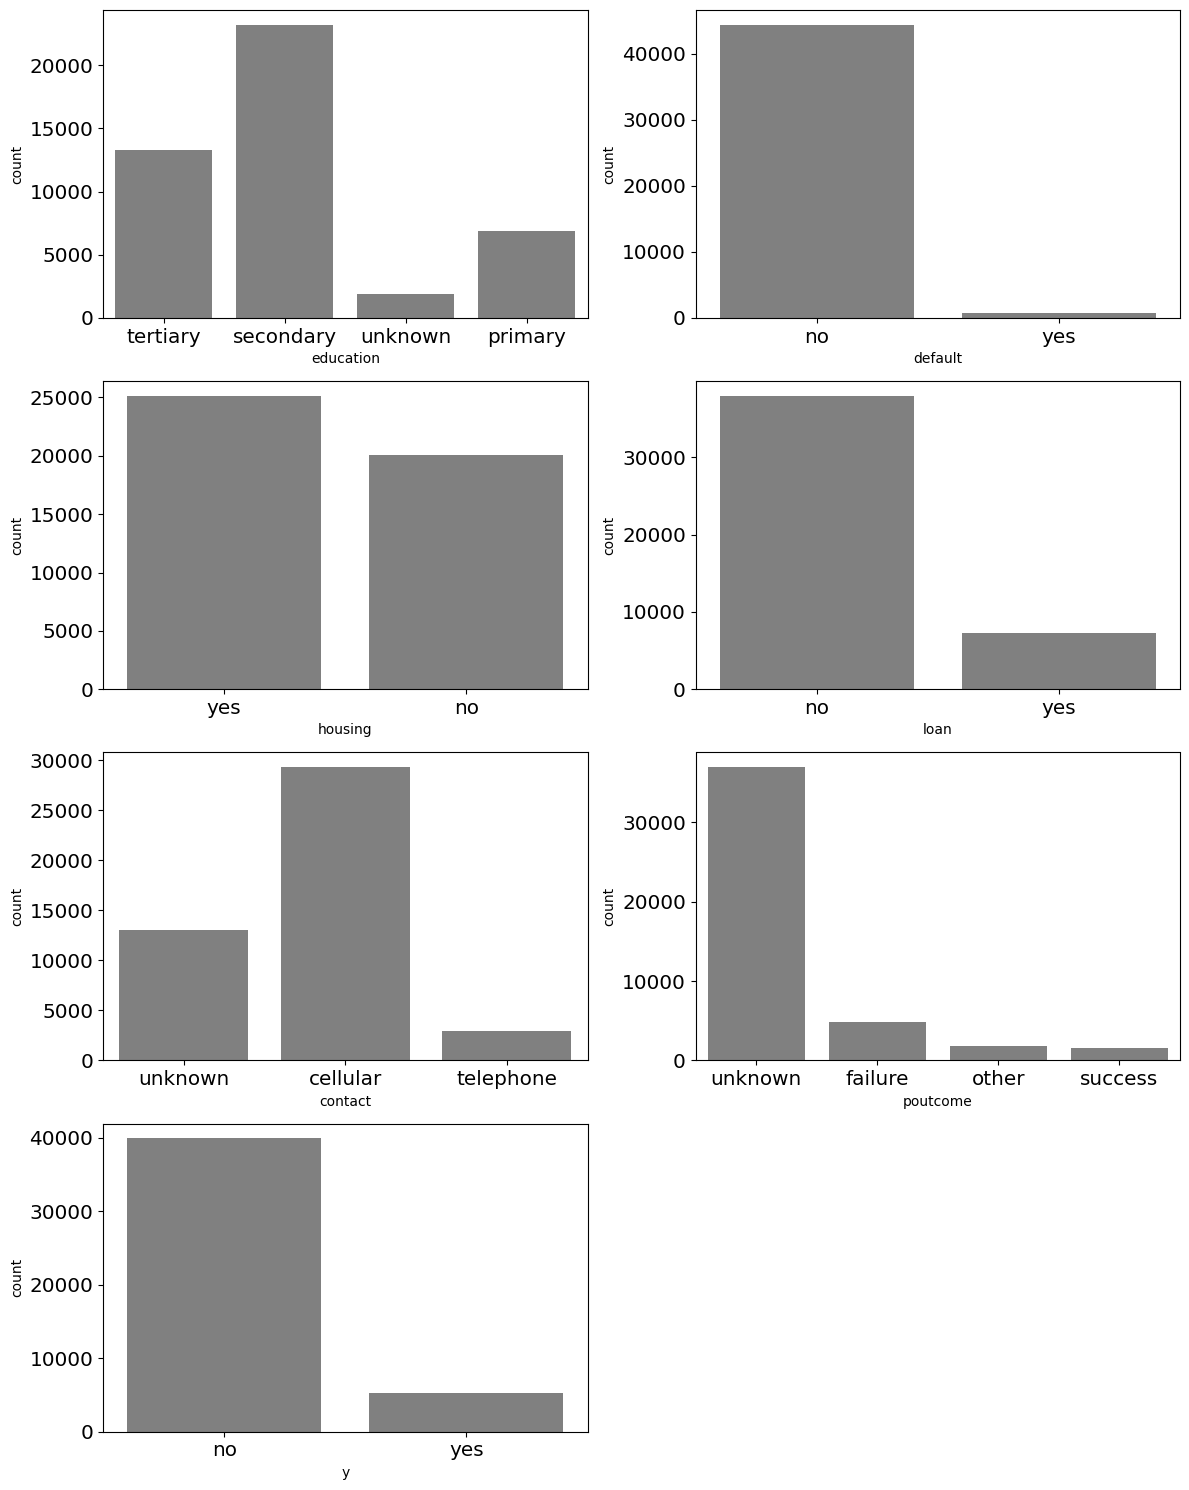

In [16]:
plt.figure(figsize=(12, 15))
num_columns = 2

for i in range(0, len(cats[2:])):
    plt.subplot(4, num_columns, i+1)
    sns.countplot(x=data[cats[2:][i]], color='gray', orient='h')
    plt.tight_layout()

### - Outlier Checking (timestamp)

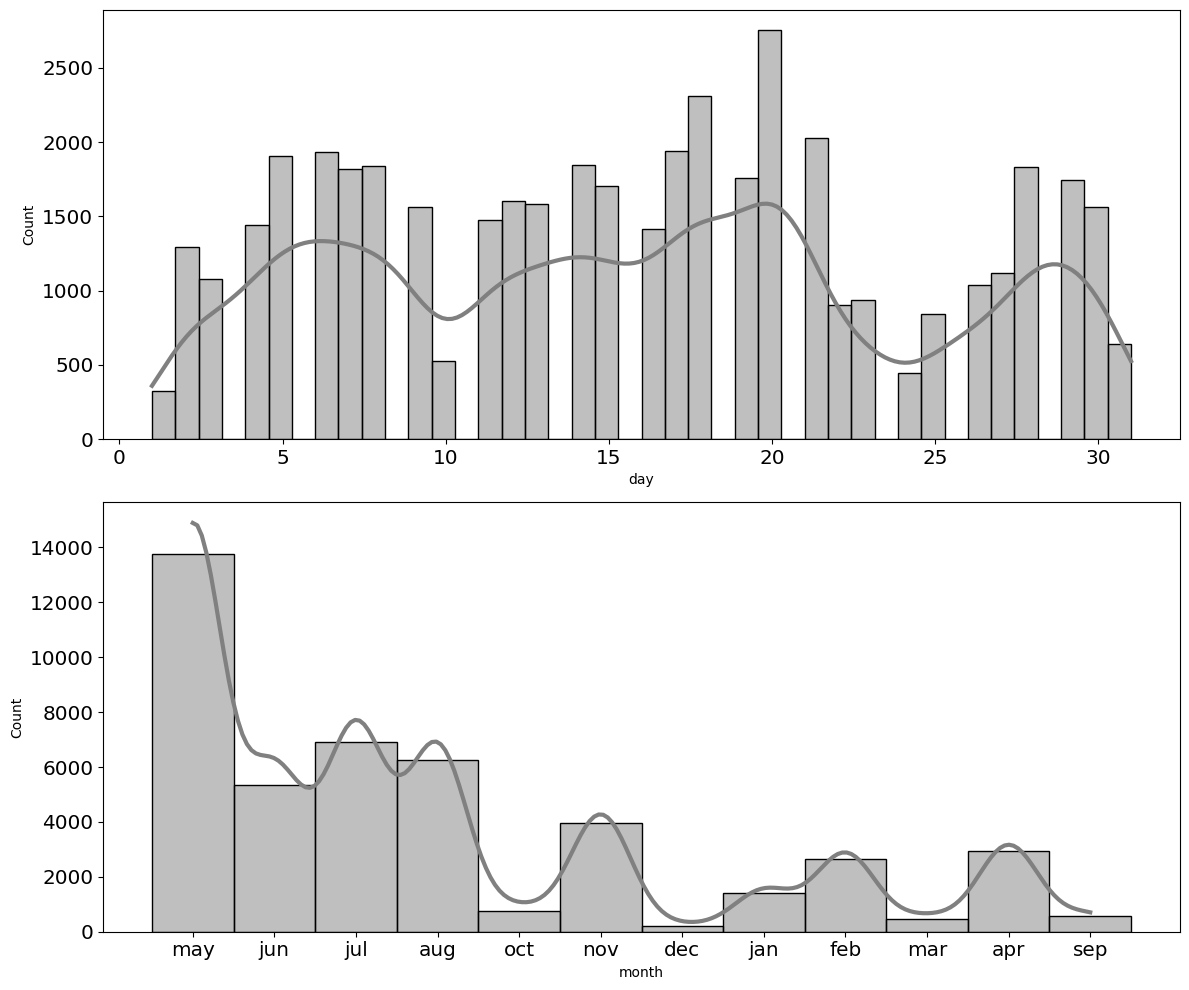

In [17]:
plt.figure(figsize=(12, 10))
num_columns = 1
for i in range(0, len(timestamp)):
    plt.subplot(2, num_columns, i+1)  # Mengatur 2 baris
    sns.histplot(data[timestamp[i]], color='gray', kde=True)
    plt.tight_layout()

plt.show()

### - Handling Outlier with IQR

In [18]:
print(f'Jumlah baris sebelum memfilter outlier: {len(data)}')

filtered_entries = np.array([True] * len(data))
for col in ['age','balance','duration','campaign']:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    filtered_entries = ((data[col] >= low_limit) & (data[col] <= high_limit)) & filtered_entries

data = data[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {len(data)}')

Jumlah baris sebelum memfilter outlier: 45211
Jumlah baris setelah memfilter outlier: 34719


### - After Cleansing IQR

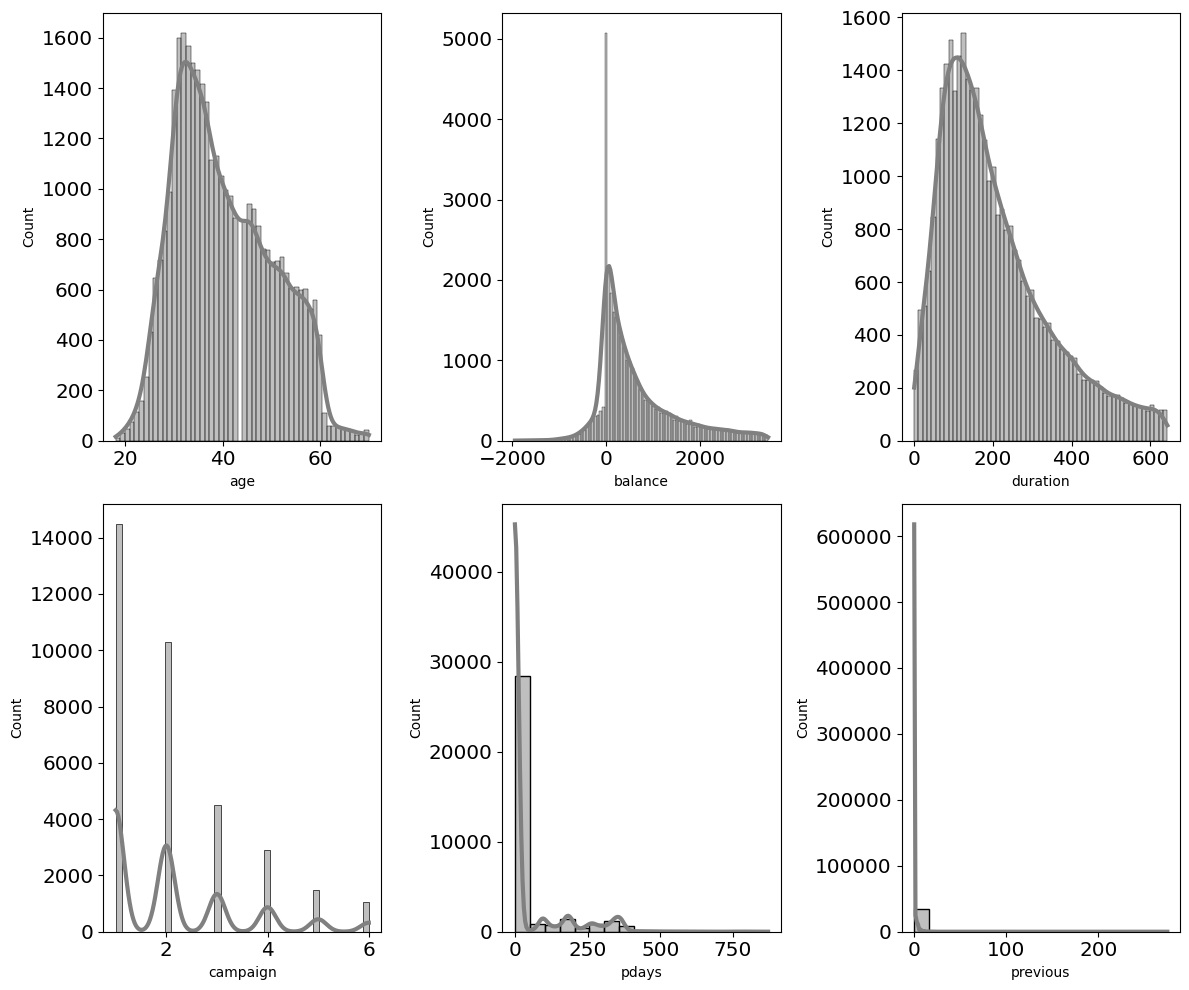

In [19]:
plt.figure(figsize=(12, 10))
num_columns = 3
for i in range(0, len(nums)):
    plt.subplot(2, num_columns, i+1)  # Mengatur 2 baris
    sns.histplot(data[nums[i]], color='gray', kde=True)
    plt.tight_layout()

plt.show()

### - Handling Outlier with Z - Score

In [20]:
print(f'Jumlah baris sebelum memfilter outlier: {len(data)}')

z_score_threshold = 2

filtered_entries = np.array([True] * len(data))
for col in ['pdays', 'previous']:
    mean_col = data[col].mean()
    std_col = data[col].std()
    z_scores = (data[col] - mean_col) / std_col
    
    # Menyaring entri berdasarkan threshold Z-score
    filtered_entries = (np.abs(z_scores) <= z_score_threshold) & filtered_entries

# Menyaring data
data = data[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {len(data)}')

Jumlah baris sebelum memfilter outlier: 34719
Jumlah baris setelah memfilter outlier: 31283


### - Distribusi hasil IQR + Z - Score 

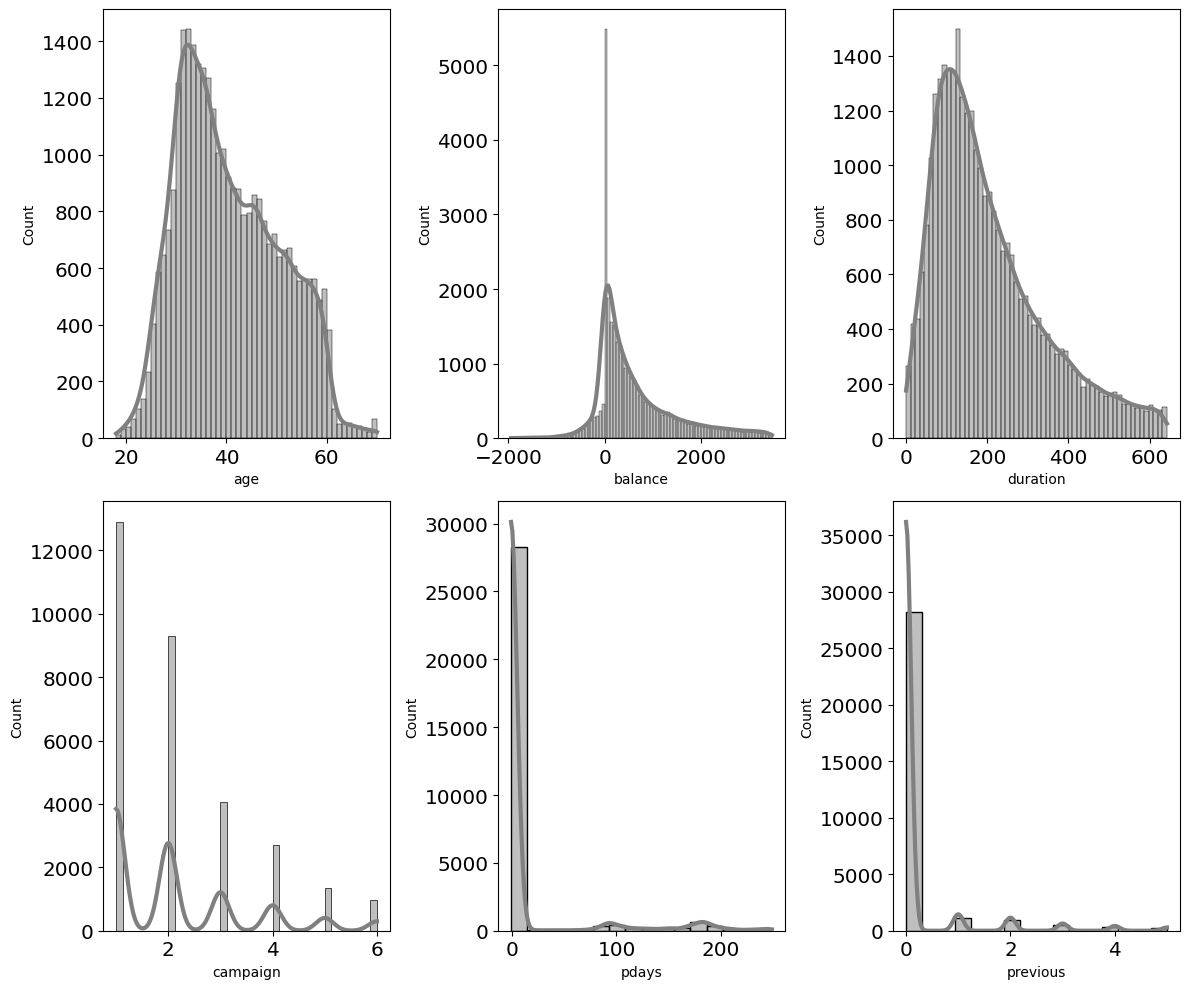

In [21]:
plt.figure(figsize=(12, 10))
num_columns = 3
for i in range(0, len(nums)):
    plt.subplot(2, num_columns, i+1)  # Mengatur 2 baris
    sns.histplot(data[nums[i]], color='gray', kde=True)
    plt.tight_layout()

plt.show()

## d. Feature Transformation

In [22]:
for col in nums:
    # menambahkan nilai kecil untuk menghindari log(0) atau log(negatif)
    data[col + '_log'] = np.log1p(np.abs(data[col]) + 1e-9)

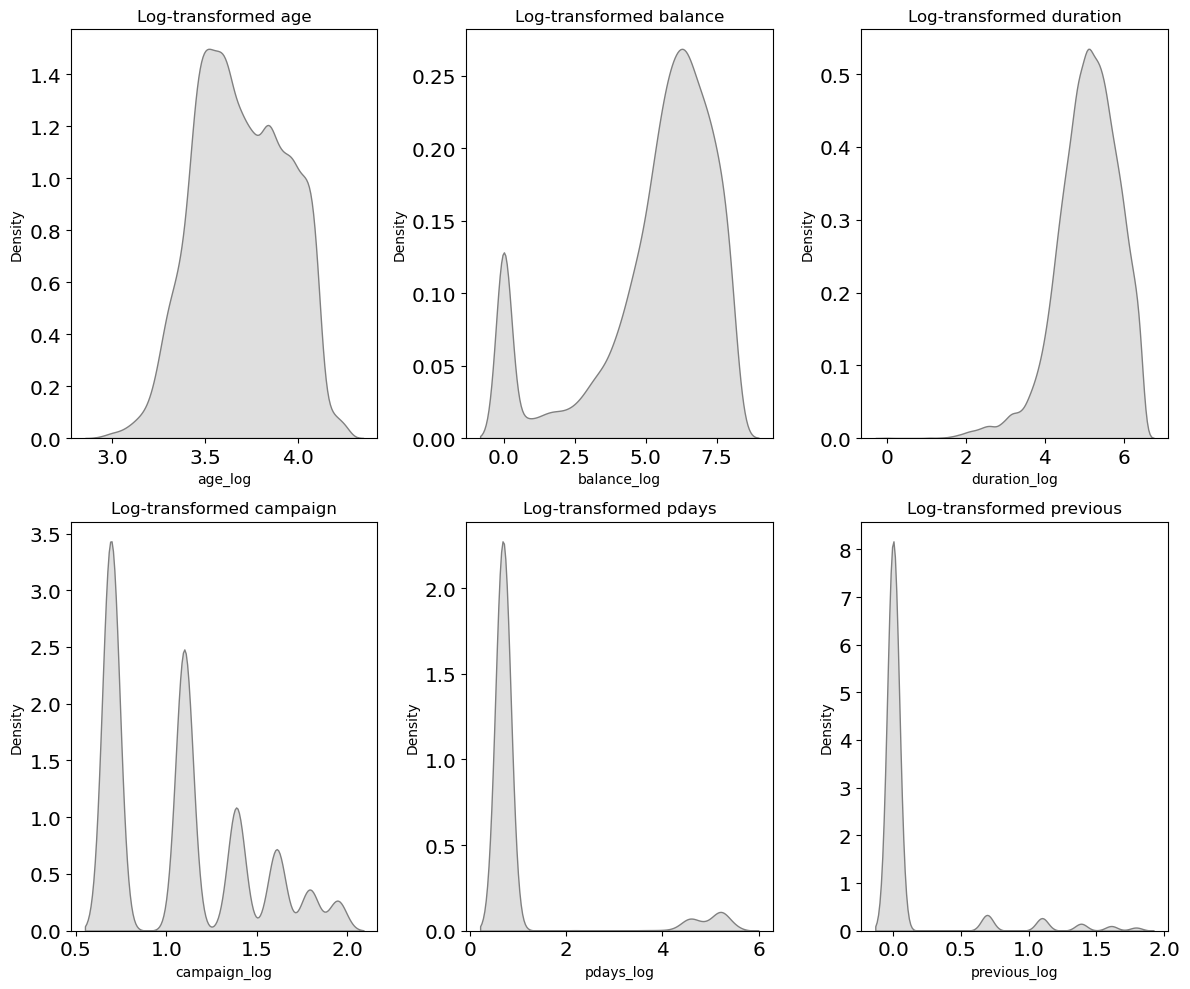

In [23]:
# Plotting
plt.figure(figsize=(12, 10))
num_columns = 3  # Menentukan jumlah kolom per baris

for i in range(len(nums)):
    plt.subplot(2, num_columns, i + 1)  # Mengatur 2 baris
    sns.kdeplot(data=data[nums[i] + '_log'], color='gray', fill=True)
    plt.title(f'Log-transformed {nums[i]}')
    plt.tight_layout()

plt.show()

In [24]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous,age_log,balance_log,duration_log,campaign_log,pdays_log,previous_log
count,31283.000000,31283.000000,31283.000000,31283.000000,31283.000000,31283.000000,31283.000000,31283.000000,3.128300e+04,3.128300e+04,31283.000000,31283.000000,3.128300e+04
mean,40.397468,632.620784,15.739347,206.665889,2.145319,13.178723,0.219672,3.694208,5.363062e+00,5.084880e+00,1.069421,1.100634,1.087217e-01
std,9.986440,842.600292,8.391785,139.326873,1.325747,46.331272,0.770525,0.241514,2.202322e+00,7.732467e-01,0.378798,1.251157,3.482813e-01
min,18.000000,-1944.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,2.944439,1.000000e-09,1.000000e-09,0.693147,0.693147,1.000000e-09
25%,32.000000,41.000000,8.000000,102.000000,1.000000,-1.000000,0.000000,3.496508,4.644391e+00,4.634729e+00,0.693147,0.693147,1.000000e-09
50%,39.000000,339.000000,16.000000,170.000000,2.000000,-1.000000,0.000000,3.688879,5.950643e+00,5.141664e+00,1.098612,0.693147,1.000000e-09
75%,48.000000,967.000000,22.000000,279.000000,3.000000,-1.000000,0.000000,3.891820,6.891118e+00,5.634790e+00,1.386294,0.693147,1.000000e-09
max,70.000000,3462.000000,31.000000,643.000000,6.000000,249.000000,5.000000,4.262680,8.149891e+00,6.467699e+00,1.945910,5.521461,1.791759e+00


### - Drop Column (After Feature Transformation)

In [25]:
## Drop dibawah Optional, silahkan buka bila ingin di drop
# data.drop(data[nums], axis=1, inplace=True)

### - Corelation Heatmap (After Feature Transformation)

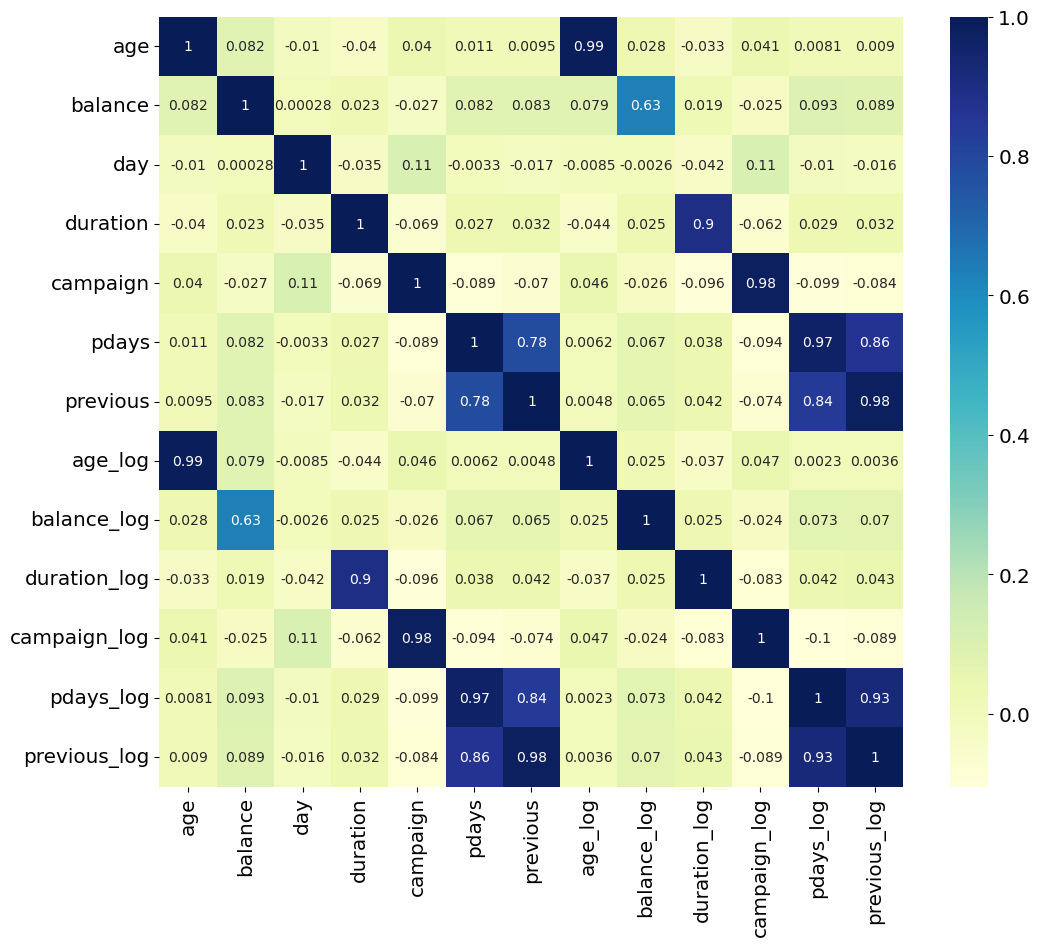

In [26]:
numeric_data = data.select_dtypes(include=[np.number])
correlation_matrix = numeric_data.corr()

# heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap="YlGnBu", annot=True)
plt.show()

## e. Feature Encoding

### - Label Encoding

In [27]:
# jenis_kelamin & pendidikan
mapping_education = {
    'unknown' : 0,
    'primary' : 1,
    'secondary' : 2,
    'tertiary' : 3
}

mapping_month = {
    'jan': 1,
    'feb': 2,
    'mar': 3,
    'apr': 4,
    'may': 5,
    'jun': 6,
    'jul': 7,
    'aug': 8,
    'sep': 9,
    'oct': 10,
    'nov': 11,
    'dec': 12
}

## Hasil Revisi, bila ada perubahan silahkan buka komen

mapping_default = {
    'no' : 0,
    'yes' : 1
}

mapping_housing = {
    'no' : 0,
    'yes' : 1
}

mapping_loan = {
    'no' : 0,
    'yes' : 1
}

mapping_y = {
    'no' : 0,
    'yes' : 1
}

In [28]:
data['education'] = data['education'].map(mapping_education)
data['month'] = data['month'].map(mapping_month)

## Hasil Revisi, bila ada perubahan silahkan buka komen

data['default'] = data['default'].map(mapping_default)
data['housing'] = data['housing'].map(mapping_housing)
data['loan'] = data['loan'].map(mapping_loan)
data['y'] = data['y'].map(mapping_y)

### - One Hot Encoding

In [29]:
data = pd.get_dummies(data, columns=['job', 'marital', 'contact', 'default', 'housing',
                                     'loan','poutcome'])

In [30]:
data.sample(10)

,age,education,balance,day,month,duration,campaign,pdays,previous,y,age_log,balance_log,duration_log,campaign_log,pdays_log,previous_log,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,contact_cellular,contact_telephone,contact_unknown,default_0,default_1,housing_0,housing_1,loan_0,loan_1,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
19745,34,3,0,8,8,201,6,-1,0,0,3.555348,1.000000e-09,5.308268,1.945910,0.693147,1.000000e-09,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,0,1
41134,22,2,948,18,8,215,1,197,2,1,3.135494,6.855409e+00,5.375278,0.693147,5.288267,1.098612e+00,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0
21344,60,1,0,18,8,142,3,-1,0,0,4.110874,1.000000e-09,4.962845,1.386294,0.693147,1.000000e-09,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,0,1
36150,36,2,0,11,5,198,1,-1,0,0,3.610918,1.000000e-09,5.293305,0.693147,0.693147,1.000000e-09,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,1,0,0,0,0,1
29278,35,3,1526,2,2,236,2,217,4,0,3.583519,7.331060e+00,5.468060,1.098612,5.384495,1.609438e+00,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,1,0,1,0,0,0
41877,26,3,1177,19,10,116,1,-1,0,0,3.295837,7.071573e+00,4.762174,0.693147,0.693147,1.000000e-09,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,0,1,0,0,0,0,1
1410,29,2,2,8,5,190,1,-1,0,0,3.401197,1.098612e+00,5.252273,0.693147,0.693147,1.000000e-09,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,1,0,1,0,0,0,0,1
13060,27,1,-90,8,7,175,1,-1,0,0,3.332205,4.510860e+00,5.170484,0.693147,0.693147,1.000000e-09,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,1,0,0,0,1
25909,38,1,190,19,11,623,1,175,1,1,3.663562,5.252273e+00,6.436150,0.693147,5.170484,6.931472e-01,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,1,0,0,1,0,0
925,30,3,112,7,5,245,1,-1,0,0,3.433987,4.727388e+00,5.505332,0.693147,0.693147,1.000000e-09,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1,1,0,0,0,0,1


## f. Handle class imbalance

In [31]:
# Catatan : RandomOverSampler tidak suport kepada one hot encoding
# X = data.drop(columns=['y_0', 'y_1'])
# y = data[['y_0', 'y_1']]

# Pisahkan fitur dan target
X = data.drop(columns='y')
y = data['y']

# Pembagian data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### - Oversampling (Yang akan Digunakan)

In [32]:
# Oversampling (Yang akan digunakan)
ros = RandomOverSampler(random_state=42)

# Variable [Oversampling] yang ditampung
X_over, y_over = ros.fit_resample(X_train, y_train)
print('Random Oversampling:')
print('Sebelum oversampling:')
print(y_train.value_counts())
print('Setelah oversampling:')
print(y_over.value_counts())

Random Oversampling:
Sebelum oversampling:
0    23081
1     1945
Name: y, dtype: int64
Setelah oversampling:
0    23081
1    23081
Name: y, dtype: int64


### - Undersampling

In [33]:
# Undersampling
rus = RandomUnderSampler(random_state=42)

# Variable [Undesampling] yang ditampung
X_under, y_under = rus.fit_resample(X_train, y_train)
print('Random Undersampling:')
print('Sebelum undersampling:')
print(y_train.value_counts())
print('Setelah undersampling:')
print(y_under.value_counts())

Random Undersampling:
Sebelum undersampling:
0    23081
1     1945
Name: y, dtype: int64
Setelah undersampling:
0    1945
1    1945
Name: y, dtype: int64


### - SMOTE

In [34]:
# SMOTE
smote = SMOTE(random_state=42)

# Variable [SMOTE] yang ditampung
X_over_SMOTE, y_over_SMOTE = smote.fit_resample(X_train, y_train)
print('SMOTE:')
print('Sebelum SMOTE:')
print(y_train.value_counts())
print('Setelah SMOTE:')
print(y_over_SMOTE.value_counts())

SMOTE:
Sebelum SMOTE:
0    23081
1     1945
Name: y, dtype: int64
Setelah SMOTE:
0    23081
1    23081
Name: y, dtype: int64


### - Handling Class imbalance Rules !

In [35]:
# Pangil variabel ini untuk (Over Samplong)
X_over, y_over

# Pangil variabel ini untuk (Under Samplong)
X_under, y_under

# Pangil variabel ini untuk (Over SMOTE)
X_over_SMOTE, y_over_SMOTE

(       age  education  balance  day  month  duration  campaign  pdays  \
 0       31          2       43   12      5       137         1     -1   
 1       34          2        1    9      7       394         1     -1   
 2       47          2        0   14      7        81         2     -1   
 3       33          3      546    9      5       253         1     -1   
 4       49          2     1120   11      5       226         2     -1   
 ...    ...        ...      ...  ...    ...       ...       ...    ...   
 46157   37          3      236    5      8       140         1     94   
 46158   28          2       29    7      5       555         1     -1   
 46159   34          2     2670   12      5       261         1    183   
 46160   51          2    -1111    4      2       508         1     -1   
 46161   66          2        0   15      7       207         1     -1   
 
        previous   age_log   balance_log  duration_log  campaign_log  \
 0             0  3.465736  3.784190e+

# Feature Engineering

## a. Feature Selection

## b. Feature Extraction

### - Fitur Kelas Usia (01)

In [36]:
# Mendefinisikan kategori usia
def categorize_age(age):
    if 5 <= age <= 11:
        return 'kanak-kanak'
    elif 12 <= age <= 25:
        return 'remaja'
    elif 26 <= age <= 45:
        return 'dewasa'
    elif 46 <= age <= 65:
        return 'lansia'
    elif age >= 66:
        return 'lansia tua'
    else:
        return 'invalid' 

data['kategori_usia'] = data['age'].apply(categorize_age)

In [37]:
data

,age,education,balance,day,month,duration,campaign,pdays,previous,y,age_log,balance_log,duration_log,campaign_log,pdays_log,previous_log,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,contact_cellular,contact_telephone,contact_unknown,default_0,default_1,housing_0,housing_1,loan_0,loan_1,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,kategori_usia
0,58,3,2143,5,5,261,1,-1,0,0,4.077537,7.670429,5.568345,0.693147,0.693147,1.000000e-09,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,1,0,0,0,0,1,lansia
1,44,2,29,5,5,151,1,-1,0,0,3.806662,3.401197,5.023881,0.693147,0.693147,1.000000e-09,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,1,0,0,0,0,1,dewasa
2,33,2,2,5,5,76,1,-1,0,0,3.526361,1.098612,4.343805,0.693147,0.693147,1.000000e-09,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,1,0,0,0,1,dewasa
3,47,0,1506,5,5,92,1,-1,0,0,3.871201,7.317876,4.532599,0.693147,0.693147,1.000000e-09,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,1,0,0,0,0,1,lansia
4,33,0,1,5,5,198,1,-1,0,0,3.526361,0.693147,5.293305,0.693147,0.693147,1.000000e-09,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0,1,0,1,0,0,0,0,1,dewasa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45201,53,3,583,17,11,226,1,184,4,1,3.988984,6.369901,5.424950,0.693147,5.220356,1.609438e+00,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1,0,lansia
45202,34,2,557,17,11,224,1,-1,0,1,3.555348,6.324359,5.416100,0.693147,0.693147,1.000000e-09,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,0,1,0,0,0,0,1,dewasa
45203,23,3,113,17,11,266,1,-1,0,1,3.178054,4.736198,5.587249,0.693147,0.693147,1.000000e-09,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,1,0,1,0,0,0,0,1,remaja
45205,25,2,505,17,11,386,2,-1,0,1,3.258097,6.226537,5.958425,1.098612,0.693147,1.000000e-09,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,1,0,0,1,0,0,0,1,remaja


In [38]:
data['kategori_usia'].value_counts()

dewasa        20555
lansia         9531
remaja         1027
lansia tua      170
Name: kategori_usia, dtype: int64

### - Fitur Kelas Segmentasi (02)

In [39]:
# Fungsi Negative Balance
def negative_balance(balance):
    if balance <= 0:
        return 'Korban Pinjol'
    else:
        return None

# Fungsi Positif Balance    
def positive_balance(balance):
    if balance <= quantiles[0.25]:
        return 'SES - D'
    elif balance <= quantiles[0.5]:
        return 'SES - C'
    elif balance <= quantiles[0.75]:
        return 'SES - B'
    else:
        return 'SES - A'

In [40]:
# Ambil data balance yang positif
positive_balances = data[data['balance'] > 0]['balance']

# Pembagian 4 kelompok kuantil
quantiles = positive_balances.quantile([0.25, 0.5, 0.75])

In [41]:
data['kategori_pendapatan'] = data['balance'].apply(negative_balance)

# Terapkan fungsi untuk balance positif
data.loc[data['balance'] > 0, 'kategori_pendapatan'] = data[data['balance'] > 0]['balance'].apply(positive_balance)

In [42]:
data

,age,education,balance,day,month,duration,campaign,pdays,previous,y,age_log,balance_log,duration_log,campaign_log,pdays_log,previous_log,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,contact_cellular,contact_telephone,contact_unknown,default_0,default_1,housing_0,housing_1,loan_0,loan_1,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,kategori_usia,kategori_pendapatan
0,58,3,2143,5,5,261,1,-1,0,0,4.077537,7.670429,5.568345,0.693147,0.693147,1.000000e-09,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,1,0,0,0,0,1,lansia,SES - A
1,44,2,29,5,5,151,1,-1,0,0,3.806662,3.401197,5.023881,0.693147,0.693147,1.000000e-09,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,1,0,0,0,0,1,dewasa,SES - D
2,33,2,2,5,5,76,1,-1,0,0,3.526361,1.098612,4.343805,0.693147,0.693147,1.000000e-09,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,1,0,0,0,1,dewasa,SES - D
3,47,0,1506,5,5,92,1,-1,0,0,3.871201,7.317876,4.532599,0.693147,0.693147,1.000000e-09,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,1,0,0,0,0,1,lansia,SES - A
4,33,0,1,5,5,198,1,-1,0,0,3.526361,0.693147,5.293305,0.693147,0.693147,1.000000e-09,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0,1,0,1,0,0,0,0,1,dewasa,SES - D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45201,53,3,583,17,11,226,1,184,4,1,3.988984,6.369901,5.424950,0.693147,5.220356,1.609438e+00,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1,0,lansia,SES - B
45202,34,2,557,17,11,224,1,-1,0,1,3.555348,6.324359,5.416100,0.693147,0.693147,1.000000e-09,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,0,1,0,0,0,0,1,dewasa,SES - B
45203,23,3,113,17,11,266,1,-1,0,1,3.178054,4.736198,5.587249,0.693147,0.693147,1.000000e-09,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,1,0,1,0,0,0,0,1,remaja,SES - D
45205,25,2,505,17,11,386,2,-1,0,1,3.258097,6.226537,5.958425,1.098612,0.693147,1.000000e-09,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,1,0,0,1,0,0,0,1,remaja,SES - B


In [43]:
data['kategori_pendapatan'].value_counts()

SES - D          6405
SES - C          6400
SES - B          6400
SES - A          6397
Korban Pinjol    5681
Name: kategori_pendapatan, dtype: int64

### - Kategori Kuartal per Tahun (03) | TIDAK DIGUNAKAN ... !

In [44]:
# def get_quarter(month):
#     if month in [1, 2, 3]:
#         return 'Q1'
#     elif month in [4, 5, 6]:
#         return 'Q2'
#     elif month in [7, 8, 9]:
#         return 'Q3'
#     elif month in [10, 11, 12]:
#         return 'Q4'

# data['kuartal'] = data['month'].apply(get_quarter)

In [45]:
# data['kuartal'].value_counts()

### - Kategori Intensitas Dihubungi (04) | TIDAK DIGUNAKAN ... !

In [46]:
# def categorize_pdays(pdays):
#     if pdays == -1:
#         return '0 - TIDAK PERNAH DIHUBUNGI'
#     elif 0 <= pdays < 7:
#         return 'DIHUBUNGI MINGGU INI'
#     elif 7 <= pdays < 14:
#         return '1 MINGGU LALU DIHUBUNGI'
#     elif 14 <= pdays < 21:
#         return '2 MINGGU LALU DIHUBUNGI'
#     elif 21 <= pdays < 28:
#         return '3 MINGGU LALU DIHUBUNGI'
#     elif 28 <= pdays < 35:
#         return '4 MINGGU LALU DIHUBUNGI'
#     elif 35 <= pdays < 60:
#         return 'SATU - BULAN TERAKHIR DIHUBUNGI'
#     elif 60 <= pdays < 90:
#         return 'DUA - BULAN TERAKHIR DIHUBUNGI'
#     elif 90 <= pdays < 120:
#         return 'TIGA - BULAN TERAKHIR DIHUBUNGI'
#     elif 120 <= pdays < 140:
#         return 'EMPAT - BULAN TERAKHIR DIHUBUNGI'
#     else:
#         return '99 - LAMA TIDAK DIHUBUNGI'
#         # week = pdays // 7 + 1
#         # return f'week {week}'

# data['intensitas_dihubungi'] = data['pdays'].apply(categorize_pdays)

In [47]:
# data['intensitas_dihubungi'].value_counts()

## c. Kesimpulan Feature Engineering

In [48]:
## Buka Komen apabila ingin simpan hasilnya

# data.to_excel('output_sementara.xlsx', index=False)